# 1. Linear Regression

## 1.1 Normal Equation
* Closed-form solution to find weights in Linear Regression
* Alternative to GD

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
X = 2 * np.random.randn(100, 1)
y = 4 + 3 * X + np.random.randn(100, 1)

In [3]:
X_b = np.c_[np.ones((100, 1)), X]

theta_best = np.linalg.inv(X_b.T.dot(X_b)).dot(X_b.T).dot(y)

In [4]:
theta_best

array([[4.18531525],
       [2.9827972 ]])

In [5]:
X_new = np.array([[2], [4]])
X_new_b = np.c_[np.ones((2, 1)), X_new]
y_predict = X_new_b.dot(theta_best)
y_predict

array([[10.15090965],
       [16.11650405]])

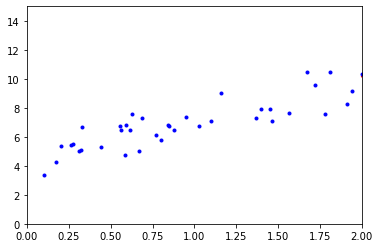

In [6]:
plt.plot(X_new, y_predict, 'r-')
plt.plot(X, y, 'b.')
plt.axis([0, 2, 0, 15])
plt.show()

### 1.1.1 Normal Equation with built-in Scikit-learn
* Under the hood = scipy.linalg.lstsq()
* Core is SVD pseudo random inverse, not Normal Equation

In [8]:
from sklearn.linear_model import LinearRegression

lin_reg = LinearRegression()
lin_reg.fit(X, y)

print(lin_reg.intercept_)
print(lin_reg.coef_)

[4.18531525]
[[2.9827972]]


In [9]:
lin_reg.predict(X_new)

array([[10.15090965],
       [16.11650405]])

## 1.2 Computational Complexity
* Normal Equation = O(n^3)
* SVD = O(n^2) (sklearn default)
* Avoid these algorithms for large datasets

# 2. Gradient Descent
* Hyperparameter = learning_rate
* Problems are long plateau and local minimum
* Fortunately, MSE for LinReg has no any local minimum => Always converges gloabl optimum
* Feature Scaling is mandatory

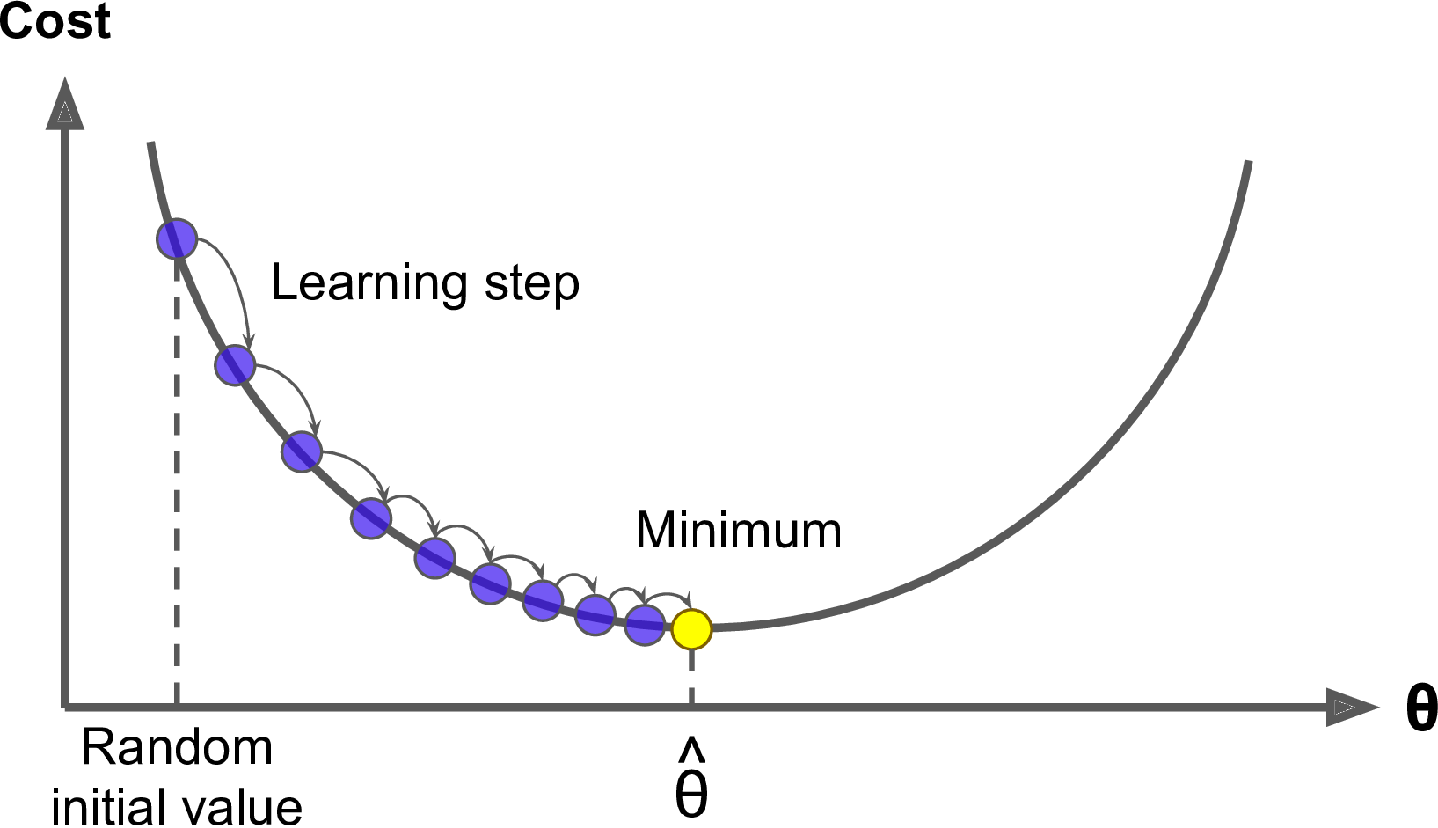

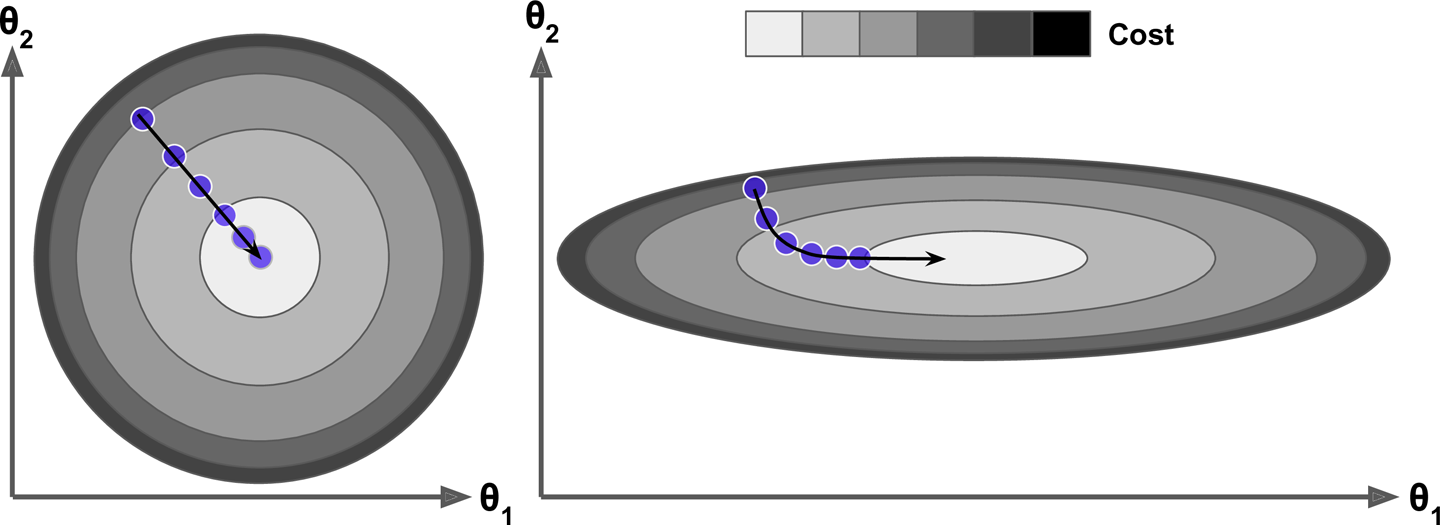

## 2.1 Batch Gradient Descent

In [10]:
eta = 0.1
n_iterations = 1000
m = 100

theta = np.random.randn(2, 1)

for iteration in range(n_iterations):
    gradients = 2/m * X_b.T.dot(X_b.dot(theta) - y)
    theta = theta - eta * gradients

In [11]:
theta

array([[4.18531525],
       [2.9827972 ]])

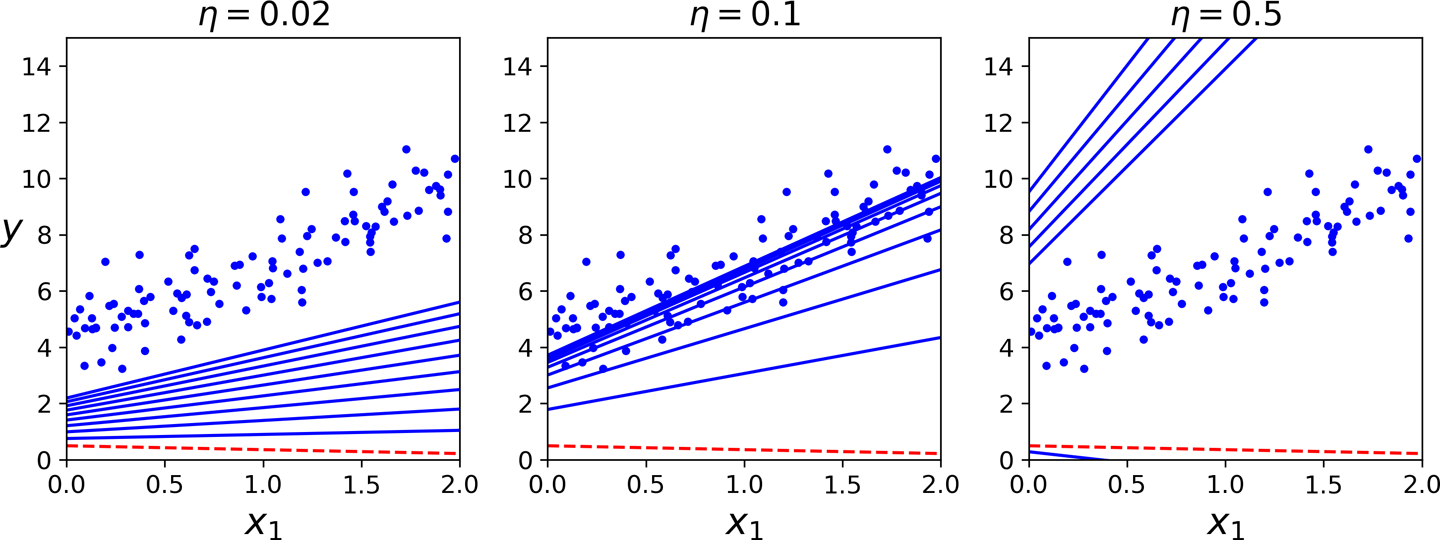

## 2.2 Stochastic Gradient Descent
* Randomly Sampled GD

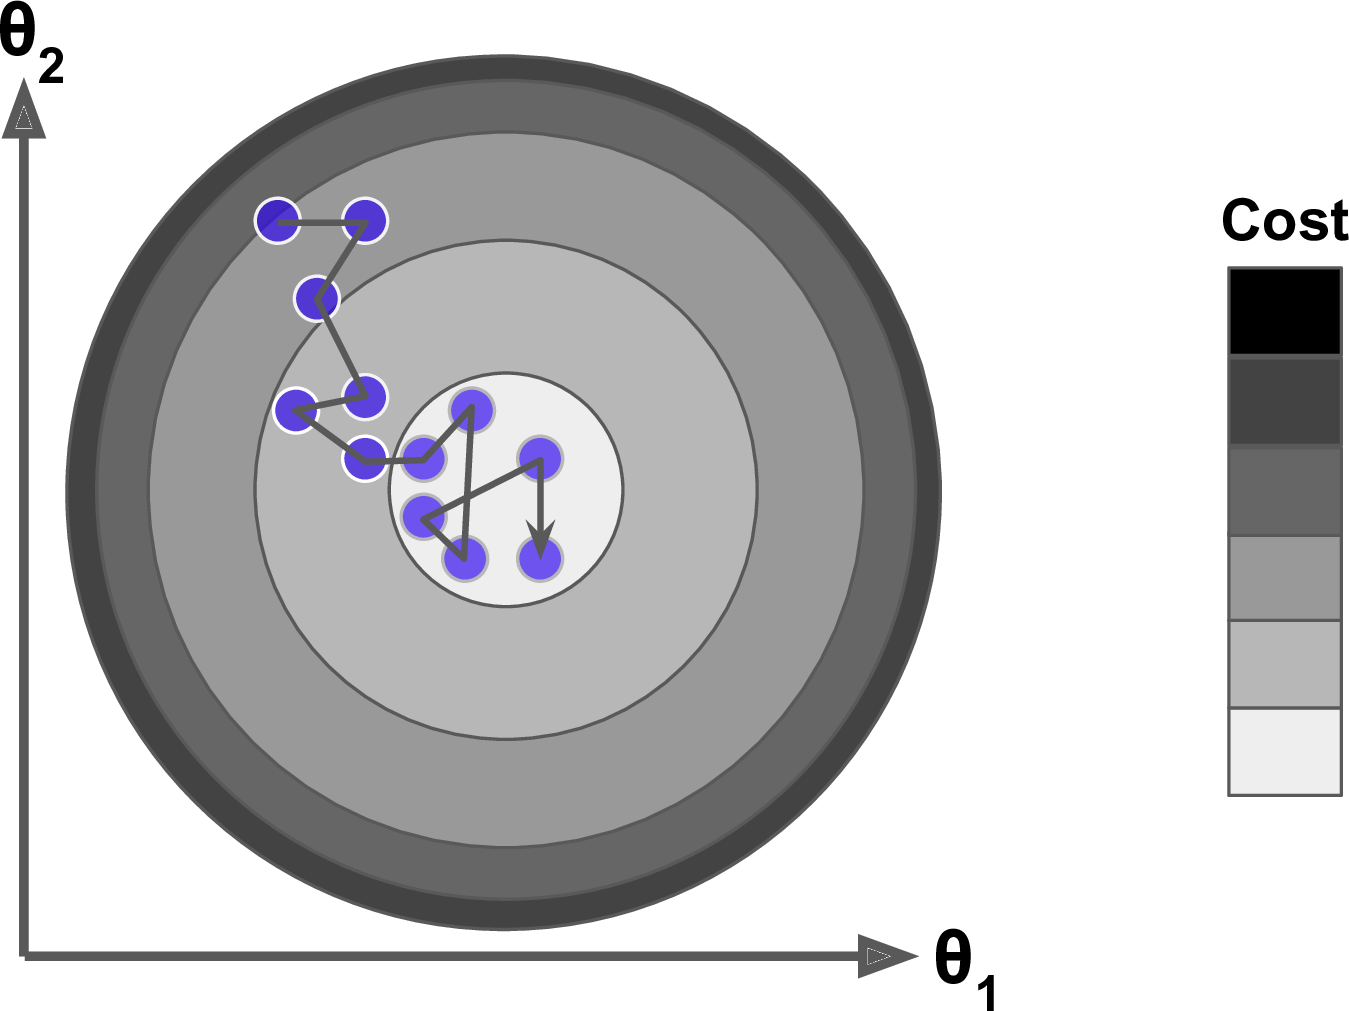

In [12]:
n_epochs = 50
t0, t1 = 5, 50

def learning_schedule(t):
    return t0 / (t + t1)

theta = np.random.randn(2, 1)

In [13]:
for epoch in range(n_epochs):
    for i in range(m):
        random_index = np.random.randint(m)
        xi = X_b[random_index:random_index+1]
        yi = y[random_index:random_index+1]
        
        gradients = 2 * xi.T.dot(xi.dot(theta) - yi)
        eta = learning_schedule(epoch * m + 1)
        theta = theta - eta * gradients

In [14]:
theta

array([[4.20960047],
       [2.94500285]])

#### Optimization algorithms under the Hood
* LinearRegression = SVD
* SGDRegressor = GD

In [15]:
from sklearn.linear_model import SGDRegressor

sgd_reg = SGDRegressor(max_iter=1000, tol=1e-3, penalty=None, eta0=0.1)
sgd_reg.fit(X, y.ravel())

SGDRegressor(eta0=0.1, penalty=None)

In [16]:
print(sgd_reg.intercept_)
print(sgd_reg.coef_)

[4.17160961]
[2.92168614]


## 2.3 Mini-batch Gradient Descent

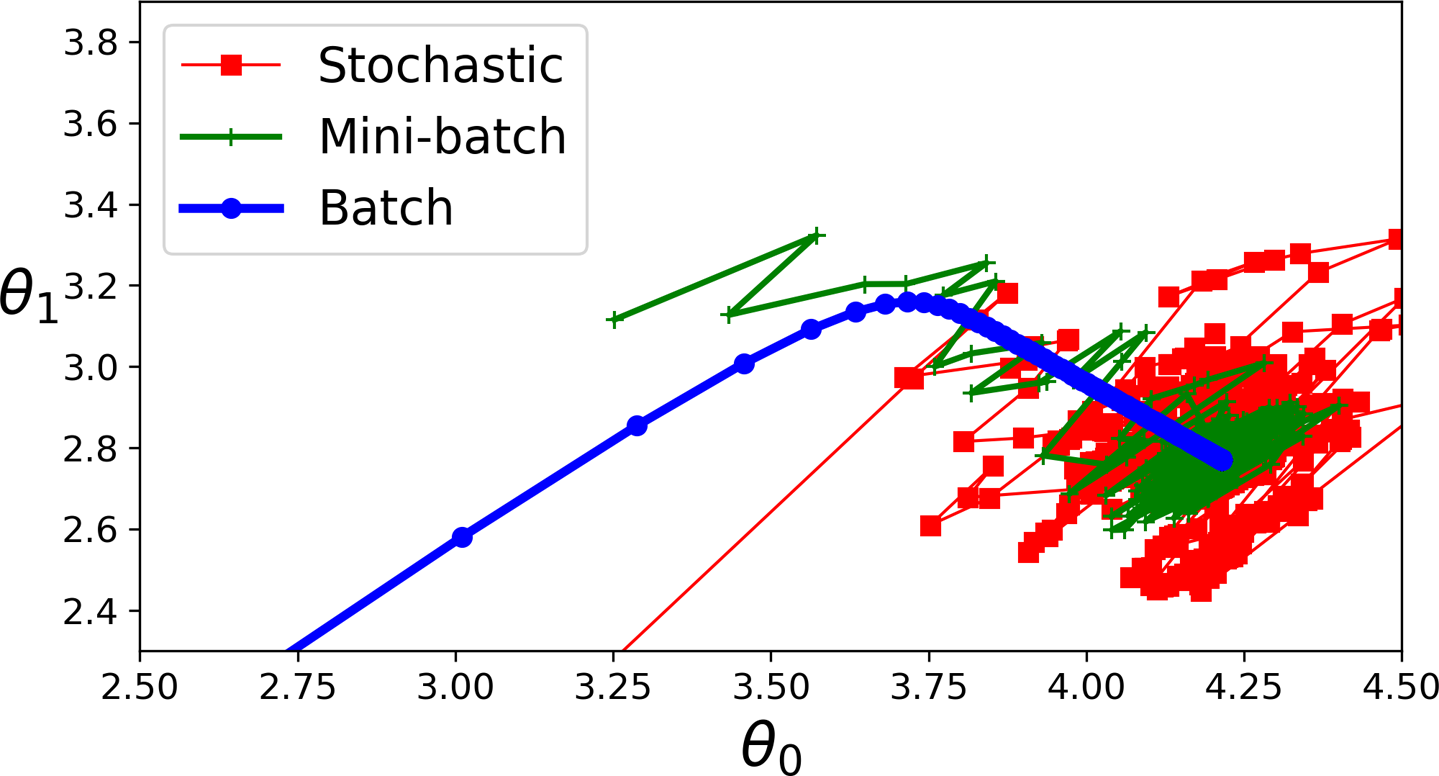